In [54]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from mlxtend.data import loadlocal_mnist
import cv2
import os
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
# %matplotlib widgetsnbextension

In [4]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/nandi/.local/lib/python3.8/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
classes = 10

In [68]:
X, Y = loadlocal_mnist(images_path='svhn-data/train-images-idx3-ubyte', labels_path='svhn-data/train-labels-idx1-ubyte')

In [44]:
X_test, Y_test = loadlocal_mnist(images_path='svhn-data/t10k-images-idx3-ubyte', labels_path='svhn-data/t10k-labels-idx1-ubyte')

In [64]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [69]:
x = X.reshape((60000,28,28,1))
x_test = X_test.reshape((X_test.shape[0],28,28,1))

In [70]:
imgs = shuffle(imgs)

In [72]:
x = np.append(x,imgs[100:],axis=0)

In [73]:
y = np.append(Y,y_imgs[100:])

In [8]:
def display(img):
    cv2.imshow("img",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [78]:
x,y = shuffle(x,y)

In [81]:
y[59000]

7

In [80]:
display(np.reshape(x[59000],(28,28)))

In [10]:
Y_test = Y_test.reshape((Y_test.shape[0],1))

In [82]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', input_shape = (28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(11, activation='softmax'))

In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x,y, epochs=5)

Epoch 1/5
1888/1888 [==============================] - 67s 35ms/step - loss: 0.1934 - accuracy: 0.9577
Epoch 2/5
1888/1888 [==============================] - 67s 35ms/step - loss: 0.0664 - accuracy: 0.9835
Epoch 3/5
1677/1888 [=========================>....] - ETA: 7s - loss: 0.0455 - accuracy: 0.9878

In [3]:
# plt.plot(history.history[''])
# plt.show()
# model = keras.models.load_model('multi_digits_model_0_10.h5')
model = keras.models.save('multi_digits_model_0_10.h5')

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
test = model.evaluate(x_test, Y_test)
print("Loss:", test[0])
print("Accuracy:", test[1])

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_11/conv2d_31/Conv2D (defined at <ipython-input-13-bf1374ba715f>:1) ]] [Op:__inference_test_function_1165]

Function call stack:
test_function


In [157]:
p = 100
print(model.predict(x_test[p].reshape(1,28,28,1)).argmax())
print(Y_test[p])

6
[6]


In [112]:
Y_test[0]

array([7], dtype=uint8)

In [99]:
x_test[0].shape

(28, 28, 1)

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
flatten_11 (Flatten)         (None, 30976)           

In [114]:
model.save('multi_digits_model_0_9.h5')

In [200]:
img = cv2.imread("svhn-data/images/img6.jpg",0)

In [170]:
img = cv2.resize(img,(28,28))
display(img)

In [171]:
img = img.reshape((1,28,28,1))

In [172]:
model.predict(img).argmax()

8

In [71]:
display(img[0])

In [372]:
h, w = img.shape
u = 0
for i in range(0,h-28+1):
    for j in range(0, w-28+1):
        m = img[i:i+28, j:j+28]
        m = m.reshape((1,28,28,1))
        u += 1
#         if u %100 == 0:
#             display(m[0])
        print(model.predict(m).argmax(), end=" ")

3 

In [195]:
l = img[0:28,0:28]

In [198]:
img.shape

(63, 72)

In [204]:
import os
l = os.system('ls')

In [341]:
import cv2
import os
import glob
img_dir = "/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/svhn-data/train_answer" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1,0)
    img = cv2.resize(img,(28,28))
    img[img < 150] = 0
    img[img > 150] = 255
    data.append(255 - img)

In [342]:
data = np.array(data)

In [343]:
data = data.reshape((6,28,28,1))
yy = np.array([3,5,5,4,5,3])
# yy = yy.reshape((6,1))

In [338]:
Y.shape

(60000,)

In [344]:
data = np.append(x,data,axis=0)
y = np.append(Y,yy,axis=0)

In [354]:
import timeit

In [371]:
tic = timeit.default_timer()
a = model.predict(data[58200:60006])
toc = timeit.default_timer()
print(toc-tic)

1.0427113469995675


In [353]:
a[2]

array([1.1698211e-21, 5.6178435e-18, 3.4721345e-18, 4.6040947e-04,
       5.0442771e-12, 9.9953961e-01, 5.4176902e-19, 8.7099322e-15,
       2.2629338e-09, 1.2682927e-08], dtype=float32)

In [345]:
display(data[60004])

In [352]:
y[60003:60006]

array([4, 5, 3])

In [35]:
f = os.listdir("out")
imgs = []
y_imgs = []
for i in f:
    path = "out/"+i
    img = cv2.imread(path,0)
    imgs.append(img)
    y_imgs.append(10)
len(imgs)
imgs = np.array(imgs)
y_imgs = np.array(y_imgs)
imgs = np.reshape(imgs,(31,28,28,1))

In [41]:
def augumentation(X_, y_):
    
    for k in range(31,60):
        print("Image:",k)
#         print("Shape:",X_[k].shape,k)
        data = img_to_array(X_[k])
        # expand dimension to one sample
#         print(data.shape)
        samples = expand_dims(data, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(width_shift_range=[-2,2])
        # datagen = ImageDataGenerator(height_shift_range=0.5)
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for i in range(5):
            # define subplot
#             pyplot.subplot(330 + 1 + i)
            # generate batch of images
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
#             print(image.shape)
            # plot raw pixel data
            image = np.expand_dims(image,0)
            X_ = np.append(X_,image,axis=0)
            y_ = np.append(y_, np.expand_dims(y_[k],0),axis=0)
#             print(y_.shape)
#             print("X_ shape:",X_.shape)
            
#             pyplot.imshow(image[0,:,:,0])
    # show the figure
    plt.show()
    print(X_.shape,y_.shape)
    return X_,y_
imgs, y_imgs = augumentation(imgs, y_imgs)

Image: 31
Image: 32
Image: 33
Image: 34
Image: 35
Image: 36
Image: 37
Image: 38
Image: 39
Image: 40
Image: 41
Image: 42
Image: 43
Image: 44
Image: 45
Image: 46
Image: 47
Image: 48
Image: 49
Image: 50
Image: 51
Image: 52
Image: 53
Image: 54
Image: 55
Image: 56
Image: 57
Image: 58
Image: 59
(486, 28, 28, 1) (486,)


In [42]:
for i in range(10):
    p = random.choice(range(0,341))
    im = imgs[p]
    im = np.reshape(im,(28,28))
    display(im)

In [32]:
imgs.shape

(31, 28, 28, 1)

In [373]:
model2 = keras.models.load_model('svhn-data/test_32x32.mat')

OSError: Unable to open file (file signature not found)

In [379]:
# Import packages 
import cv2
import numpy as np

#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('svhn-data/train_answer/3.jpg')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

cv2.imshow('img', vis)

cv2.waitKey(0)

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [380]:
mser = cv2.MSER_create()
img = cv2.imread('svhn-data/train_answer/3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()
regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
for i, contour in enumerate(hulls):
    x,y,w,h = cv2.boundingRect(contour)
    cv2.imwrite('{}.png'.format(i), img[y:y+h,x:x+w])

In [395]:
from scipy.io import loadmat
import mat73

In [396]:
mat = mat73.loadmat('svhn-data/train/digitStruct.mat')

TypeError: only integer scalar arrays can be converted to a scalar index

In [404]:
import h5py
arrays = {}
with h5py.File('svhn-data/train/digitStruct.mat', 'r') as f:
    for k, v in f.items():
        arrays[k] = np.array(v)

In [6]:
from unpacker import DigitStructWrapper

def get_bounding_boxes(start_path = '.'):
    """ Extracts a bounding box file and returns a dictionary
    """
    return DigitStructWrapper(start_path).unpack_all()

# Extract the bounding boxes (this will take a while!)
train_bbox = get_bounding_boxes('svhn-data/train/digitStruct.mat')
# test_bbox = get_bounding_boxes('data/test/digitStruct.mat')
# extra_bbox = get_bounding_boxes('data/extra/digitStruct.mat')

# Display the information stored about an individual image


/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])
/home/nandi/alpha/files/3_6/IVP/mini-project/ipynb/unpacker.py:27: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  attr = [attr.value[0][0]]


NameError: name 'json' is not defined

In [7]:
import json
print(json.dumps(train_bbox[0], indent=2))

{
  "filename": "1.png",
  "boxes": [
    {
      "height": 219.0,
      "label": 1.0,
      "left": 246.0,
      "top": 77.0,
      "width": 81.0
    },
    {
      "height": 219.0,
      "label": 9.0,
      "left": 323.0,
      "top": 81.0,
      "width": 96.0
    }
  ]
}


In [402]:
for k, v in f.items():
    arrays[k] = np.array(v)

TypeError: Not a location id (invalid object ID)

In [24]:
img = x_test[0]

In [25]:
contours = cv2.findContours(img, cv2.RETR_LIST, cv2.RETR_EXTERNAL) 

In [29]:
# imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [54]:
import math

In [75]:
img = cv2.imread('/tmp/3.jpeg',0)
# img = cv2.resize(img, (28,28))
t = np.mean(img) + np.std(img)/2
t = 150
img[img < t] = 0
img[img > t] = 255
vis = cv2.Canny(img,1,0)
display(img)
display(vis)
# mser = cv2.MSER_create()
# regions = mser.detectRegions(vis)
# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(vis)
for p in regions:
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    cv2.rectangle(vis, (xmin,ymax), (xmax,ymin), (150), 1)

display(vis)
vis = cv2.resize(vis, (28,28))
display(vis)
# cv2.polylines(vis, hulls, 10, (125))
cv2.imwrite('/tmp/tmp1.png', vis)
cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import random as rng
def thresh_callback(val, src_gray, area_threshold = 35):
    threshold = val
    
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    display(canny_output)
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    drawing = cv2.cvtColor(src_gray,cv2.COLOR_GRAY2BGR)
    print(len(contours))
    
    for i in range(len(contours)):
        print(i)
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        x,y,w,h = boundRect[i]
        print("Area:",w*h)
        if w*h > area_threshold:
            cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
              (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 0)
        display(drawing)
#         cv2.drawContours(drawing, contours_poly, i, color)
#         if a < b:
#         cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    
    
#     cv.imshow('Contours', drawing)
    display(drawing)
    cv2.imwrite('out/30.png', drawing)
    return contours, boundRect

In [31]:
def th(img):
    t = 150
    img[img < t] = 255
    img[img >= t] = 0

In [225]:
img = cv2.imread('svhn-data/b.jpeg',0)
thresh_callback(25,img)

823
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [196]:
# img = cv2.imread('../second/images/img30.jpg',0)
# img = cv2.GaussianBlur(img,(3,3),200)
# img = cv2.dilate(img, kernel)
img = th1.copy()
img = 255 - img
mask = np.ones(img.shape[:2], np.uint8)*0
mask[10:h-10, 0:w-10] = 255
img = cv2.bitwise_and(img,img,mask = mask)
# t = np.mean(img) + np.std(img)/2
# t = np.mean(img)
print("T:",t)

display(img)
print(img[30])
# img[img < t] = 0
# img[img > t] = 255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img[30])
img = 255 - img
print(img[30])
display(img)
thresh_callback(100,img)

T: 100
[255 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0
   0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
[255 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0
   0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255
 255   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255]
11
0
1
2
3
4
5
6
7
8
9
10


In [47]:
img = cv2.imread('../second/images/img30.jpg',0)
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],dtype = np.uint8)
# kernel = np.ones((5,5),np.uint8)
# img = cv2.GaussianBlur(img,(3,3),10)
img3 = cv2.equalizeHist(img)
display(img3)
img2 = cv2.dilate(img, kernel)
display(img2 - img)

(60, 69)


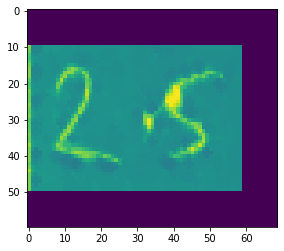

In [187]:
img = cv2.imread('../second/images/img30.jpg',0)
img = 255 - img
# img = cv2.GaussianBlur(img,(3,3),10)
img = cv2.erode(img,kernel,iterations=1)
mask = np.zeros(img.shape[:2], np.uint8)
# display(mask)
h,w = img.shape
print(img.shape)
mask[10:h-10, 0:w-10] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img);
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
# plt.plot(hist_full)
# plt.plot(hist_mask)
# plt.show()
t = 100
img[img < t] = 0
img[img > t] = 255
display(img)

### OTSU Thresholding 

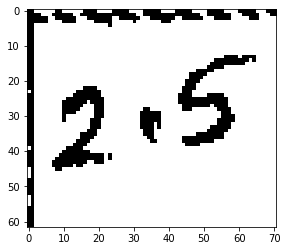

In [17]:
im = cv2.imread('../second/images/img7.jpg',0)
_,th1 = cv2.threshold(im, 127,255, cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray');

array([[255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       ...,
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

15
0
Area: 18


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

1
Area: 32


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

2
Area: 16


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

3
Area: 42


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

4
Area: 42


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

5
Area: 400


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

6
Area: 420


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

7
Area: 27


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

8
Area: 18


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

9
Area: 570


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

10
Area: 570


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

11
Area: 570


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

12
Area: 540


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

13
Area: 72


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

14
Area: 16


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

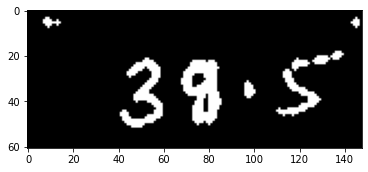

In [4]:
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]],dtype = np.uint8)
p = 65
im = cv2.imread('../second/images/img{0}.jpg'.format(p),0)
_,th1 = cv2.threshold(im, 127,255, cv2.THRESH_OTSU)
display(th1);
img = th1.copy()
img = cv2.dilate(img,kernel)
img = cv2.erode(img,kernel)
h,w = img.shape
img = 255 - img
display(img)
plt.imshow(img, cmap='gray');
mask = np.ones(img.shape[:2], np.uint8)*0
mt = 10
mask[mt:h-mt, mt:w-mt] = 255
display(mask)
img = cv2.bitwise_and(img,img,mask = mask)
# t = np.mean(img) + np.std(img)/2
# t = np.mean(img)
# print("T:",t)

display(img)
# print(img[30])
# img[img < t] = 0
# img[img > t] = 255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print(img[30])
# img = 255 - img
# print(img[30])
display(img)
con,boundings = thresh_callback(50,img, area_threshold=20)

In [100]:
boundings = sorted(boundings, key=lambda x: x[0])
for b in boundings:
    x,y,w,h = b
    if w*h > 25:
        k = img[y:y+h,x:x+w]
        k = cv2.resize(k,(28,28))
        k = k.reshape((1,k.shape[0],k.shape[1],1))
        display(k[0])
        print(model.predict(k).argmax())

2
2
8
8
2
2
8
5
5
4
4


In [95]:
boundings[0][1]

33

In [77]:
x_test[0].shape

(28, 28, 1)

In [82]:
k.shape

(1, 28, 28, 1)

In [85]:
model.predict(k).argmax()

5

In [41]:
np.array(regions)

ValueError: could not broadcast input array from shape (28,4) into shape (28)

In [44]:
for p in regions:
    print(np.array(p).shape)

(28,)
(28, 4)


In [46]:
len(regions)

2